In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
training_data_gen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [3]:
test_data_gen = ImageDataGenerator(rescale =1./255)

In [14]:
train_generator = training_data_gen.flow_from_directory(
    'data/train_set',
    target_size =(150, 150),
    color_mode="rgb",
    classes=["kagit,makas,tas"],
    class_mode = 'categorical')
#batch_size=32,

Found 0 images belonging to 1 classes.


In [5]:
test_generator = test_data_gen.flow_from_directory(
    'data/test_set',
    target_size = (150, 150),
    class_mode = 'categorical'
) 

Found 372 images belonging to 3 classes.


In [6]:
model = tf.keras.models.Sequential([
    #we prepare input layer with shape (150,150) and 3 bytes colors
    #150x150lik ve 3 bayt renk kodları olan input katmanı, ilk convolution katmanı
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape= (150,150,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    #Second layer with 64 nodes
    #ikinci convolution katmanı
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # max pooling ile 2x2lik parçalara bölüyoruz fotoğrafı, ve max değeri alıp yeni layera yazıyoruz 
    #(4 elementin en büyüğünü) 3. convolution layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The 4. convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #Artık küçültmemiz gerekiyor output layer için
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    #Bu 512 node (nöron), benim outputumu 3 kategoriye nasıl ayırdığımı öğretmek için.
    #Tüm detayları ile öğrenebilmesi için
    tf.keras.layers.Dense(512,activation= 'relu'),
    tf.keras.layers.Dense(3,activation= 'softmax')  
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [8]:
model.compile( loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])
history = model.fit_generator(train_generator, epochs=25, validation_data = test_generator, verbose = 1)



Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
79/79 [==============================] - 200s 3s/step - loss: 1.2977 - accuracy: 0.3992 - val_loss: 0.8535 - val_accuracy: 0.6156
Epoch 2/25
79/79 [==============================] - 171s 2s/step - loss: 0.8801 - accuracy: 0.5885 - val_loss: 0.3471 - val_accuracy: 0.9167
Epoch 3/25
79/79 [==============================] - 193s 2s/step - loss: 0.5834 - accuracy: 0.7472 - val_loss: 0.1471 - val_accuracy: 0.9892
Epoch 4/25
79/79 [==============================] - 182s 2s/step - loss: 0.4091 - accuracy: 0.8361 - val_loss: 0.0665 - val_accuracy: 0.9731
Epoch 5/25
79/79 [==============================] - 193s 2s/step - loss: 0.3014 - accuracy: 0.8901 - val_loss: 0.1798 - val_accuracy: 0.9059
Epoch 6/25
79/79 [==============================] - 188s 2s/step - loss: 0.2312 - accuracy: 0.9194 - val_loss: 0.1498 - val_accuracy: 0.9570
Epoch 7/25
79/79 [==============================] - 176s 2s/step - loss: 0.195

In [22]:
model.save("tkm.h5")

MAKAS


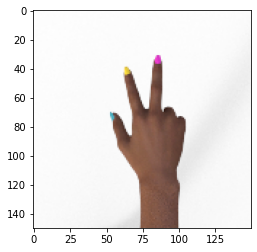

In [28]:
path ="data/test_set/makas/testscissors02-08.png"
img = image.load_img(path, target_size=(150, 150))
plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)

if classes[0][0] ==1:
    print("KAĞIT")
elif classes[0][1] ==1:
    print("MAKAS")
elif classes[0][2]==1:
    print("TAŞ")

[[0. 0. 1.]]


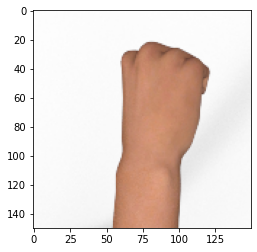

In [20]:
path ="data/test_set/tas/testrock01-29.png"
img = image.load_img(path, target_size=(150, 150))
plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)

if classes[0][0] ==1:
    print("KAĞIT")
elif classes[0][1] ==1:
    print("MAKAS")
elif classes[0][2]==1:
    print("TAŞ")

MAKAS


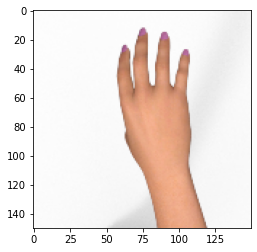

In [31]:
path ="data/test_set/kagit/testpaper01-26.png"
img = image.load_img(path, target_size=(150, 150))
plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)

if classes[0][0] ==1:
    print("KAĞIT")
elif classes[0][1] ==1:
    print("MAKAS")
elif classes[0][2]==1:
    print("TAŞ")